In [32]:
# extract the run time and number of operations (matmult) from the log file of each method (from ts_run.py)
# plot the linear relation relation between number of operations (matmult) and run time
# plot the L-curve between F_distance (calculated in ts_run.py) and number of operations (matmult): find the optimal method

import numpy as np
import matplotlib.pyplot as plt

# load the timestep test results: timestep, distance
data = np.load('distance_time_convergence.npz')   

/tmp/ipykernel_91756/4077907974.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


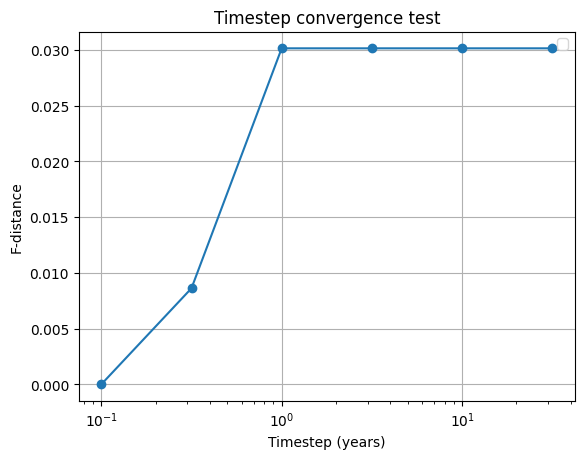

In [33]:

# Data for plotting
fig, ax = plt.subplots()
ax.plot(data['t'], data['error'], marker="o")

ax.set(xlabel='Timestep (years)', ylabel='F-distance', title='Timestep convergence test')
ax.set_xscale('log')

ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()

In [34]:
def extract_lines_with_keyword(file_path, keyword):
    # List to store lines that contain the keyword
    extracted_lines = []

    # Open the text file in read mode
    with open(file_path, 'r') as file:
        # Iterate over each line in the file
        for line in file:
            # Check if the keyword is in the current line
            if keyword in line:
                # Append the line to the list if keyword is present
                extracted_lines.append(line.strip())

    return extracted_lines

N = 10  # total number of solvers
matmult = np.zeros(N)
run_time = np.zeros(N)

for i in range(N):
    # Path to the text file
    file_path = './perf/'+ str(i+1) +  '.txt'

    print(file_path)
    # Keyword to search for in the file
    # keyword = '3:             Run:'

    keyword = 'MatMult '
    # Extract lines containing the keyword
    lines = extract_lines_with_keyword(file_path, keyword)    # only one line contains the time

    for line in lines[1:]:    # only count the matmul of the run
    # for line in lines:
        # Strip leading and trailing whitespace
        line = line.strip()
        words = line.strip().split()
        print(words)

        matmult[i] += float(words[1]) 

    keyword = 'Run:'

    # Extract lines containing the keyword
    lines = extract_lines_with_keyword(file_path, keyword)    # only one line contains the time

    for line in lines:
        # Strip leading and trailing whitespace
        line = line.strip()
        words = line.strip().split()
        print(words)

        run_time[i] += float(words[2]) 
        
print("Total number of matrix multiplication (setup + run): " + str(matmult))
print("Total run time (second): " + str(run_time))
    # # # Print the extracted lines
    # print("Lines containing the keyword:")
    # for line in lines:
    #     print(line)


./perf/1.txt
['MatMult', '6121728', '1.0', '2.0038e+00', '1.0', '1.13e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '2', '37', '0', '0', '0', '2', '37', '0', '0', '0', '562']
['3:', 'Run:', '8.3185e+01', '97.7%', '3.0584e+09', '99.7%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf/2.txt
['MatMult', '6132646', '1.0', '2.0527e+00', '1.0', '1.23e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '2', '35', '0', '0', '0', '2', '35', '0', '0', '0', '601']
['3:', 'Run:', '9.3995e+01', '98.2%', '3.5101e+09', '99.7%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf/3.txt
['MatMult', '428831', '1.0', '2.0356e-01', '1.0', '3.74e+08', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '2', '48', '0', '0', '0', '2', '49', '0', '0', '0', '1839']
['3:', 'Run:', '9.9483e+00', '87.1%', '7.6530e+08', '98.7%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf/4.txt
['MatMult', '491438', '1.0', '2.3116e-01', '1.0', '4.46e+08', '1.0', '0.0e+00', '0.0e+00',

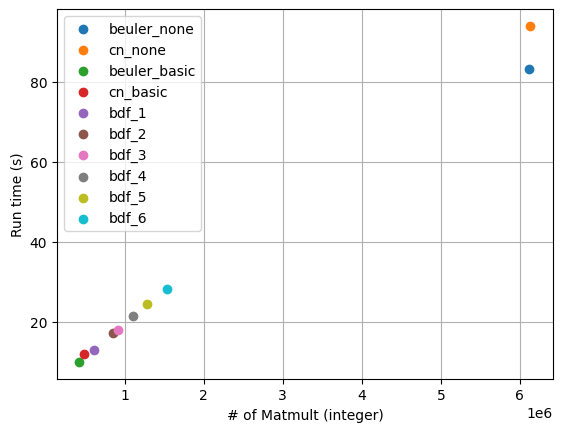

In [35]:
# taken from https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html
# https://matplotlib.org/tutorials/introductory/sample_plots.html
# You may need to type %matplotlib inline here

labels = ["beuler_none","cn_none","beuler_basic","cn_basic","bdf_1","bdf_2","bdf_3","bdf_4","bdf_5","bdf_6"]

# Data for plotting
fig, ax = plt.subplots()
for i in range(N):
       # if i in range(2):
       ax.scatter(matmult[i], run_time[i], label=labels[i])
       # else:
              # ax.scatter(matmult[i], run_time[i], label=labels[i])

ax.set(xlabel='# of Matmult (integer)', ylabel='Run time (s)',
       title='')
ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()

[2.37743247 2.41688693 1.70841156 2.89364622 1.97347491 2.00430026
 2.05781434 2.1595711  2.21167765 2.25090933]


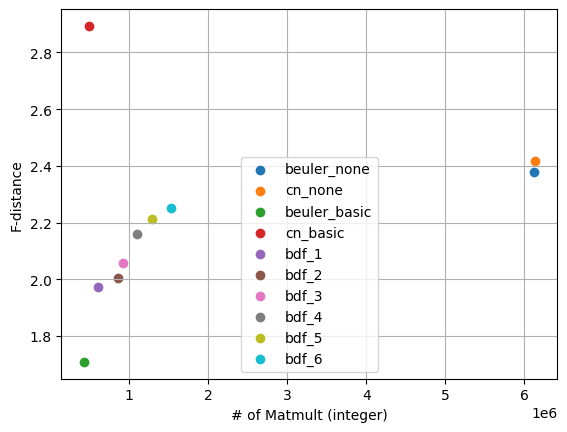

In [36]:
# distance = [0. ,0.01986094, 0.33407299, 0.1566364,  0.29071953, 0.26608679, 0.23403724, 0.17496637, 0.15404278, 0.11963454]
# distance = [0.  ,       0.01986094, 0.33407299, 0.1566364 , 0.29071953 ,0.26608679, 0.23403724, 0.17496637, 0.15404278, 0.11963454]
distance = np.load("distance_methods_31.npy")
# distance = np.abs(distance - np.mean(distance))
print(distance)

# plt.figure(figsize=(12, 6))

labels = ["beuler_none","cn_none","beuler_basic","cn_basic","bdf_1","bdf_2","bdf_3","bdf_4","bdf_5","bdf_6"]

# Data for plotting
fig, ax = plt.subplots()
for i in range(N):

      # if i in range(2):
      # ax.scatter(matmult[i], distance[i], label=labels[i], color = "k")
      # else:
      ax.scatter(matmult[i], distance[i], label=labels[i])

ax.set(xlabel='# of Matmult (integer)', ylabel='F-distance',
       title='')
ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()